<a href="https://colab.research.google.com/github/cmgospod/DS-Unit-2-Kaggle-Challenge/blob/master/module1/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
train_labels = train['status_group']
train_features = train.drop(['status_group'], axis=1)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels)

In [5]:
X_train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.003722,-0.006890,0.000289,0.001975,-0.005430,-0.002687,-0.004875,0.001063,-0.000843
amount_tsh,-0.003722,1.000000,0.070320,0.021561,-0.051491,0.003544,-0.025688,-0.022644,0.016852,0.063432
gps_height,-0.006890,0.070320,1.000000,0.149625,-0.039114,0.010419,-0.182881,-0.171448,0.134250,0.657841
longitude,0.000289,0.021561,0.149625,1.000000,-0.427534,0.033115,0.034806,0.152758,0.089145,0.397171
latitude,0.001975,-0.051491,-0.039114,-0.427534,1.000000,0.004409,-0.222797,-0.205013,-0.023605,-0.248963
num_private,-0.005430,0.003544,0.010419,0.033115,0.004409,1.000000,-0.025359,-0.007265,0.009720,0.034975
region_code,-0.002687,-0.025688,-0.182881,0.034806,-0.222797,-0.025359,1.000000,0.681682,0.097751,0.032942
district_code,-0.004875,-0.022644,-0.171448,0.152758,-0.205013,-0.007265,0.681682,1.000000,0.066770,0.049692
population,0.001063,0.016852,0.134250,0.089145,-0.023605,0.009720,0.097751,0.066770,1.000000,0.260632
construction_year,-0.000843,0.063432,0.657841,0.397171,-0.248963,0.034975,0.032942,0.049692,0.260632,1.000000


In [6]:
X_train.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
55482,42219,0.0,2013-01-30,Dwsp,1330,DWE,34.071914,-3.001140,Mtunza Wazazi,0,Lake Victoria,Mwabasabi,Shinyanga,17,1,Bariadi,Nkoma,400,True,GeoData Consultants Ltd,WUG,NaN,False,1997,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
24627,5643,500.0,2011-03-08,Government Of Tanzania,1613,DWE,38.237806,-4.481832,Kwa Mzee Pochi,0,Pangani,Kilimia,Tanga,4,1,Lushoto,Sunga,1,True,GeoData Consultants Ltd,VWC,Shengui forest,True,1971,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
5193,43963,0.0,2013-02-25,Unicef,899,UNICEF,35.057322,-10.518462,Kwa Mzee Kijiko,0,Lake Nyasa,Tanki La Maji,Ruvuma,10,3,Mbinga,Litumbandyosi,80,NaN,GeoData Consultants Ltd,VWC,Government,True,2008,mono,mono,motorpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe
26959,59459,0.0,2011-07-19,Danida,0,Central government,33.867008,-9.575491,Kwa Jericho Mwasongwe,0,Lake Nyasa,Nyiluko,Mbeya,12,3,Kyela,Kyela Urban,0,True,GeoData Consultants Ltd,VWC,Sinyanga water supplied sch,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
13590,25349,0.0,2011-07-25,Ustawi,0,USTAWI,32.909440,-2.703798,Kambi Ya,0,Lake Victoria,Kasemi,Mwanza,19,7,Missungwi,Idetemya,0,NaN,GeoData Consultants Ltd,Parastatal,NaN,True,0,ksb,submersible,submersible,parastatal,parastatal,never pay,never pay,soft,good,insufficient,insufficient,lake,river/lake,surface,communal standpipe multiple,communal standpipe


In [0]:
import category_encoders as ce
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(),
    DecisionTreeClassifier(min_samples_leaf=30))

In [0]:






def datacleaning(frame):
  frame = frame.copy()
  frame = frame.drop(['quantity_group', 'source_type', 'quality_group', 
                      'management_group', 'id', 'num_private', 'funder', 
                      'gps_height', 'subvillage', 'wpt_name', 'scheme_name', 
                      'recorded_by', 'region_code','district_code', 'extraction_type_group', 'waterpoint_type_group', 'amount_tsh'], axis=1)
  frame['latitude'] = frame['latitude'].replace(-2e-08, 0)
  frame['latitude'] = frame['latitude'].replace(-2e-08, 0)
  cols_with_zeroes = ['latitude', 'longitude', 'construction_year']
  for col in cols_with_zeroes:
    frame[col] = frame[col].replace(0, np.nan)
  high_cardinality = ['installer', 'lga', 'ward']
  for col in high_cardinality:
    top10 = frame[col].value_counts()[:10].index
    frame.loc[~frame[col].isin(top10), col] = 'OTHER'
  frame['date_recorded'] = pd.to_datetime(frame['date_recorded'], infer_datetime_format=True)
  frame['date_recorded'] = frame['date_recorded'].dt.year
  return frame


In [0]:
X_train = datacleaning(X_train)
X_val = datacleaning(X_val)
X_test = datacleaning(test)

In [0]:
categorical = ['funder', 'installer', 'basin', 'region', 'lga', 'ward', 
                 'public_meeting', 'scheme_management', 'permit', 
                 'extraction_type', 'extraction_type_class', 'management', 
                 'management_group', 'payment', 'payment_type', 'water_quality', 
                 'quantity', 'source', 'source_class', 'watertype_type']
numerical = ['latitude', 'longitude', 'construction_year', 'date_recorded']

In [11]:
pipeline.fit(X_train, y_train)
print(pipeline.score(X_train, y_train))
print(pipeline.score(X_val, y_val))

0.7910662177328844
0.7638383838383839


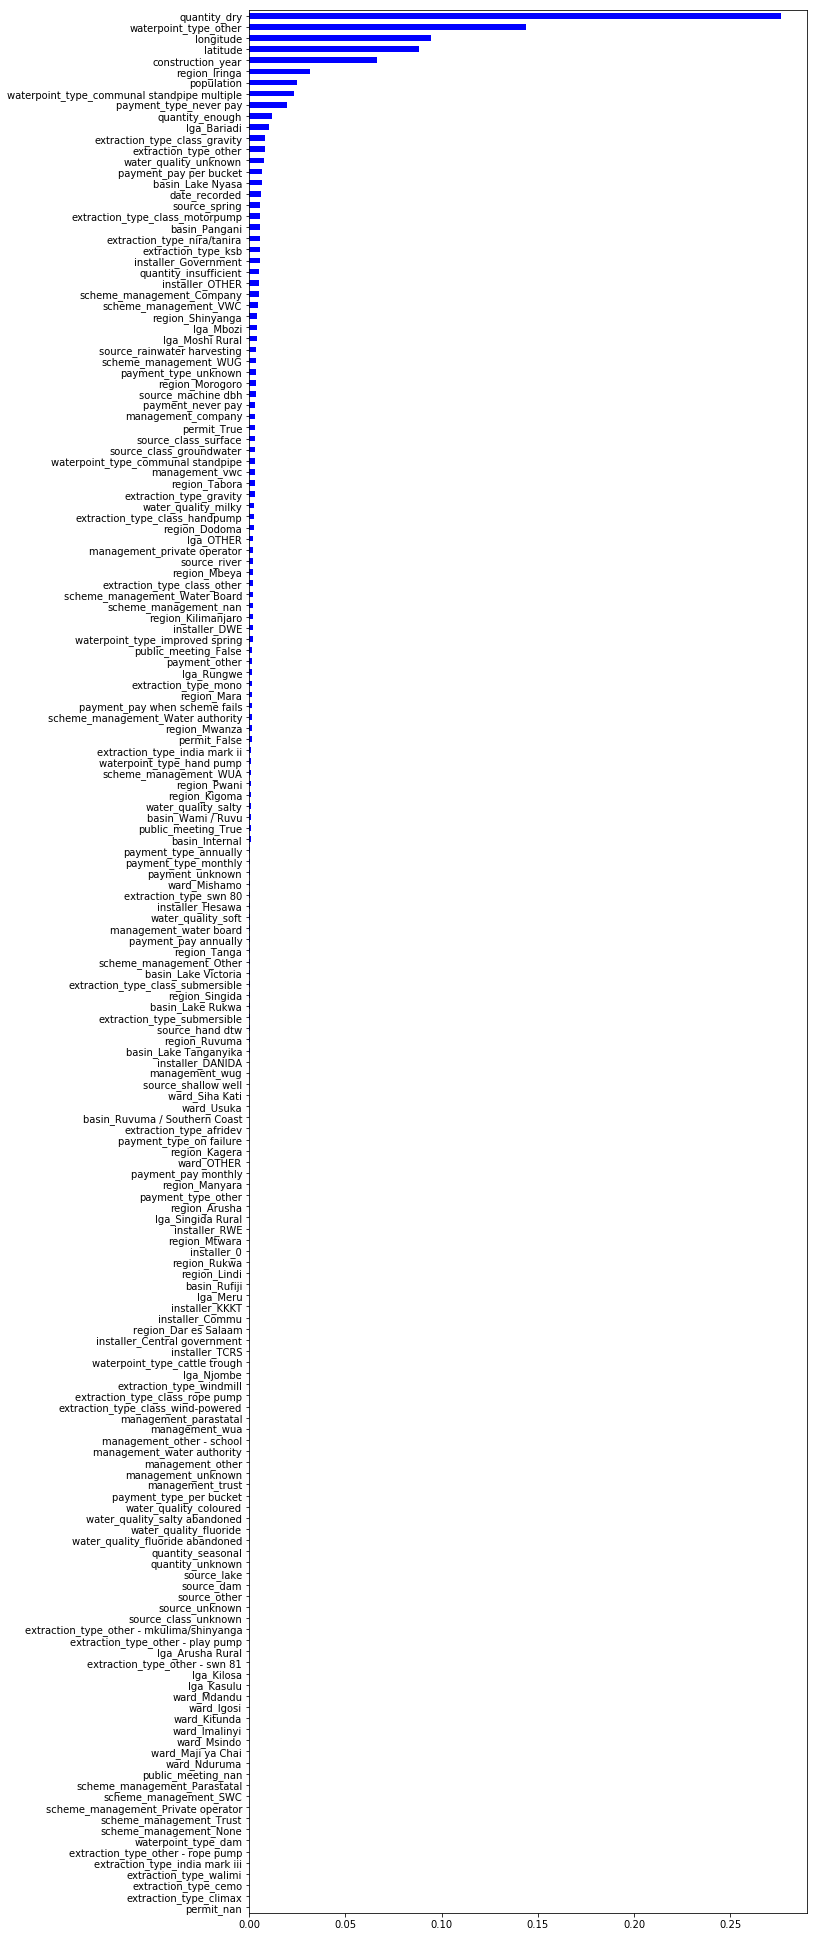

In [12]:
# import pandas_profiling as pp
# pp.ProfileReport(X_train)
import matplotlib.pyplot as plt
model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,35))
importances.sort_values().plot.barh(color='blue')
plt.show;


In [13]:
submission_array = pipeline.predict(X_test)
sub_df = pd.Series(submission_array)
sub_id = test['id']
submission_df = pd.concat([sub_id, sub_df], axis=1, ignore_index=True)
submission_df = submission_df.rename(mapper={0:'id',1:'status_group'}, axis=1)
submission_df

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
5,52449,functional
6,24806,non functional
7,28965,non functional
8,36301,functional
9,54122,functional


In [14]:
sample_submission
# testsub = pd.read_csv('submission0.csv')
# testsub

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional
5,52449,functional
6,24806,functional
7,28965,functional
8,36301,functional
9,54122,functional


In [0]:
submission_df.to_csv('submission0.csv', index=False)

In [16]:
testsub = pd.read_csv('submission0.csv')
testsub

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
5,52449,functional
6,24806,non functional
7,28965,non functional
8,36301,functional
9,54122,functional
